In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Preparation

In [19]:
np.random.seed(6798)
X = np.random.rand(200,2)

In [20]:
X[0:100,:] = X[0:100,:]*4 + 10 
X[100:,:] = X[100:,:]*4 + 13

In [4]:
Y = np.ones(200)
Y[:100] = 0

## Visualization

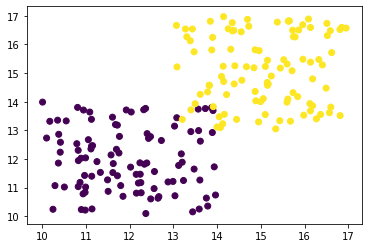

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## Algorithm

In [6]:
def dist(x1,x2):
    return np.sqrt(np.sum(np.power(np.subtract(x1,x2),2)))

In [27]:
def KNN(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [28]:
KNN(X,Y,[13,14])

[[0.49391561 1.        ]
 [0.50263609 1.        ]
 [0.56572646 0.        ]
 [0.62419513 0.        ]
 [0.65114056 1.        ]]
(array([0., 1.]), array([2, 3], dtype=int64))


1.0

## Split Data into Test/Train

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
print(X_train.shape,X_test.shape)

(140, 2) (60, 2)


In [11]:
print(Y_train.shape,Y_test.shape)

(140,) (60,)


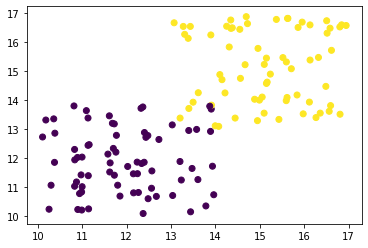

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

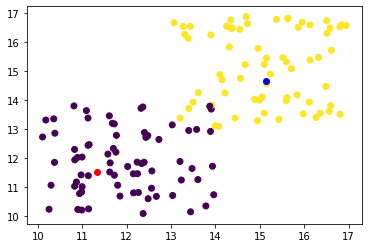

In [13]:
query_1 = X_test[17]
query_2 = X_test[59]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.scatter(query_1[0],query_1[1],color="red")
plt.scatter(query_2[0],query_2[1],color="blue")
plt.show()

## Test Accuracy

In [14]:
def score(X_train,X_test,Y_train,Y_test):
    
    m = X_test.shape[0]
    
    y_pred = []
    
    for i in range(m):
        pred = KNN(X_train,Y_train,X_test[i])
        y_pred.append(pred)
    
    acc = accuracy_score(Y_test, y_pred)
    
    return acc

In [15]:
score(X_train,X_test,Y_train,Y_test)

0.95